<a href="https://colab.research.google.com/github/aksha76/test-repo/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


Load the Dataset

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
print("First 5 rows of dataset:")
diabetes_dataset.head()


First 5 rows of dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset Overview

In [ ]:
print("\nDataset shape (rows, columns):", diabetes_dataset.shape)
print("\nStatistical Summary:")
diabetes_dataset.describe()




Dataset shape (rows, columns): (768, 9)

Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("\nCount of Outcome (0 = Non-Diabetic, 1 = Diabetic):")
print(diabetes_dataset['Outcome'].value_counts())


Count of Outcome (0 = Non-Diabetic, 1 = Diabetic):
Outcome
0    500
1    268
Name: count, dtype: int64


Outcome Distribution Plot

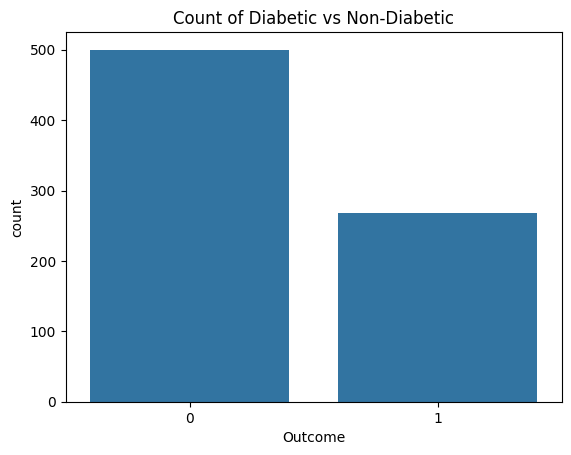

In [ ]:
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Count of Diabetic vs Non-Diabetic')
plt.show()


Grouped Means by Outcome

In [ ]:
print("\nMean values grouped by Outcome:")
diabetes_dataset.groupby('Outcome').mean()



Mean values grouped by Outcome:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Pairplot of Selected Features

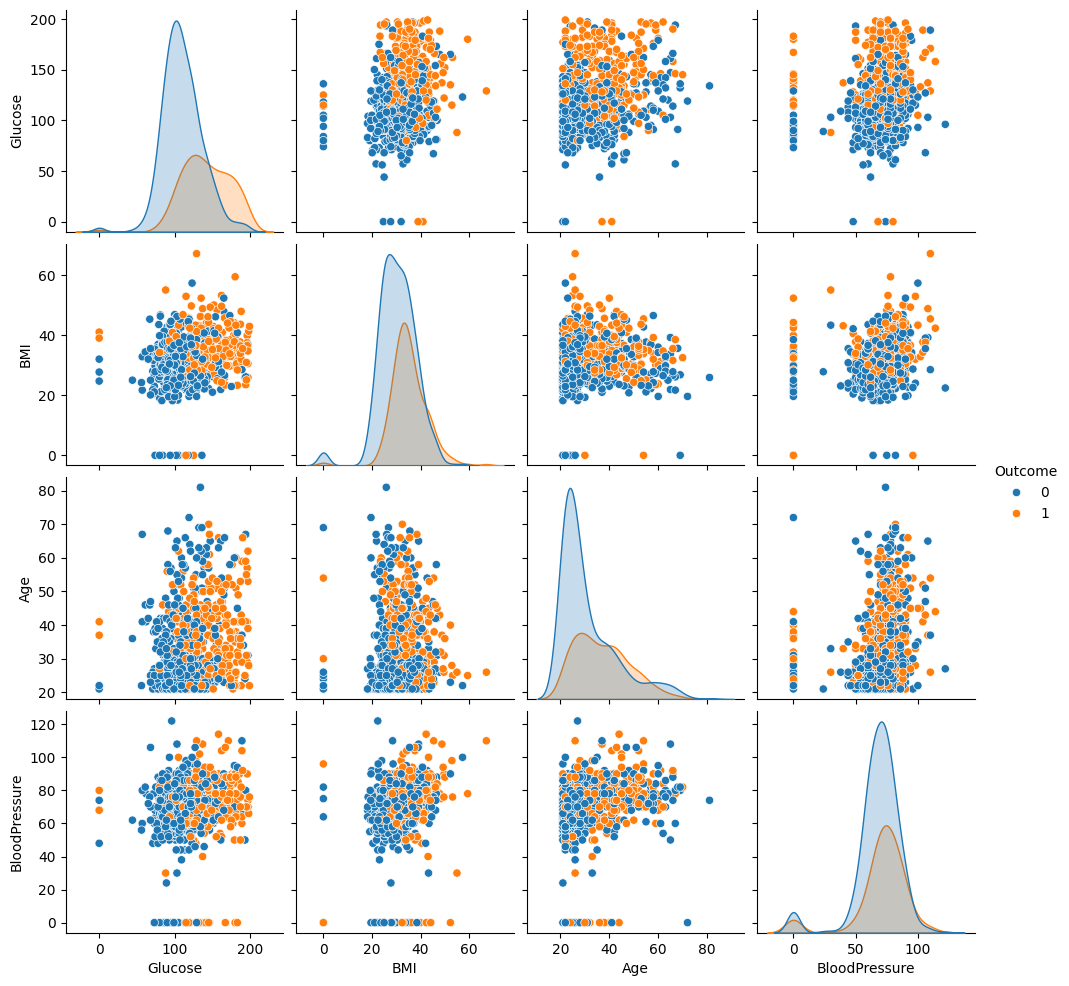

In [ ]:
sns.pairplot(diabetes_dataset, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'BloodPressure'])
plt.show()


 Correlation Heatmap

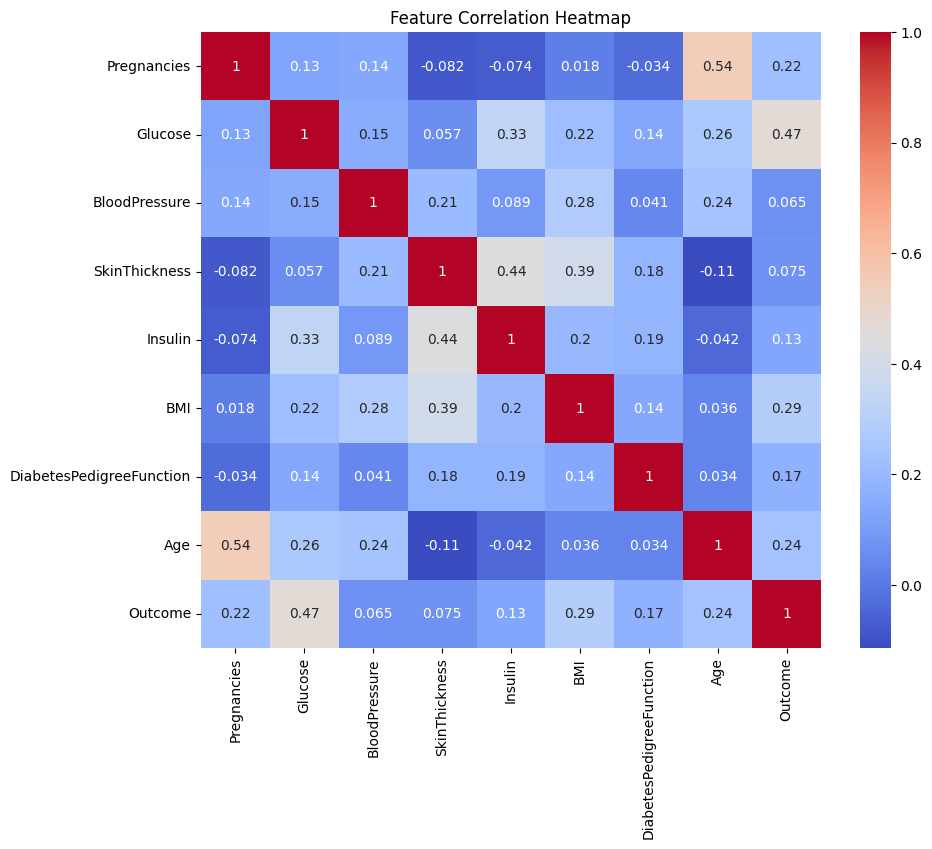

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Feature and Label Separation

In [ ]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

print("\nFeatures (X):")
X.head()



Features (X):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
print("\nLabels (Y):")
Y.head()



Labels (Y):


,Outcome
0,1
1,0
2,1
3,0
4,1


Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

print("\nStandardized feature sample:")
print(X[:5])



Standardized feature sample:
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("\nShapes after train-test split:")
print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



Shapes after train-test split:
X shape: (768, 8)
X_train shape: (614, 8)
X_test shape: (154, 8)


Train the SVM Model

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

Model Accuracy

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('\nTraining Accuracy:', training_data_accuracy)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Test Accuracy:', test_data_accuracy)



Training Accuracy: 0.7866449511400652
Test Accuracy: 0.7727272727272727


Accuracy Comparison Plot

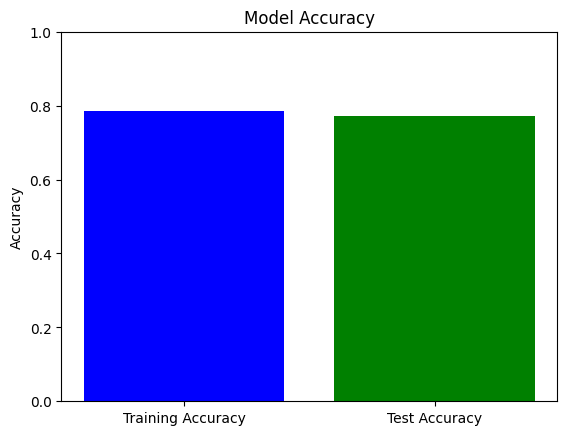

In [ ]:
accuracies = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim([0, 1])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


Confusion Matrix

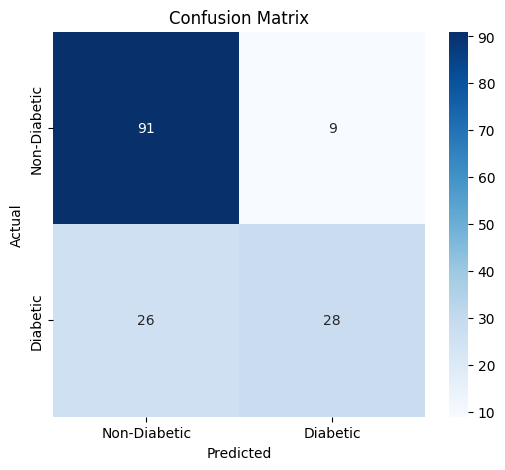

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Prediction on New Data

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_df = pd.DataFrame([input_data], columns=diabetes_dataset.columns[:-1])
std_data = scaler.transform(input_df)

prediction = classifier.predict(std_data)
print("Prediction:", prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


Prediction: [1]
The person is diabetic
